# Exploring Dandiset 000563: Allen Institute Openscope - Temporal Barcoding of Visual Responses

> **Note**: This notebook was generated with AI assistance. Please validate all code and interpretations independently.

## Overview
This notebook explores data from a study investigating temporal precision in neural responses to visual stimuli across the mouse brain. The dataset, collected at the Allen Institute, contains Neuropixels recordings during presentation of temporally modulated visual stimuli.

View this dataset on DANDI: [https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)

In this notebook, we will:
1. Access the dataset using the DANDI API
2. Explore the structure of the NWB files
3. Analyze and visualize LFP data
4. Examine electrode locations and properties

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Get asset URL for a specific NWB file
url = next(dandiset.get_assets_by_glob("sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb")).download_url

# Open the remote file and create NWB reader
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring NWB File Structure
Let's examine key metadata and contents of the NWB file.

In [3]:
# Print basic session information
print(f"Session ID: {nwb.session_id}")
print(f"Session Start: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Experiment: {nwb.stimulus_notes}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age} ({nwb.subject.age_in_days} days)")
print(f"Sex: {nwb.subject.sex}")
print(f"Genotype: {nwb.subject.genotype}")

Session ID: 1318772854
Session Start: 2023-12-19 00:00:00-08:00
Institution: Allen Institute for Brain Science
Experiment: OpenScopeTemporalBarcode

Subject Information:
Subject ID: 699241
Age: P124D (124.0 days)
Sex: M
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


## Analyzing LFP Data
The dataset contains Local Field Potential (LFP) recordings. Let's examine and visualize this data.

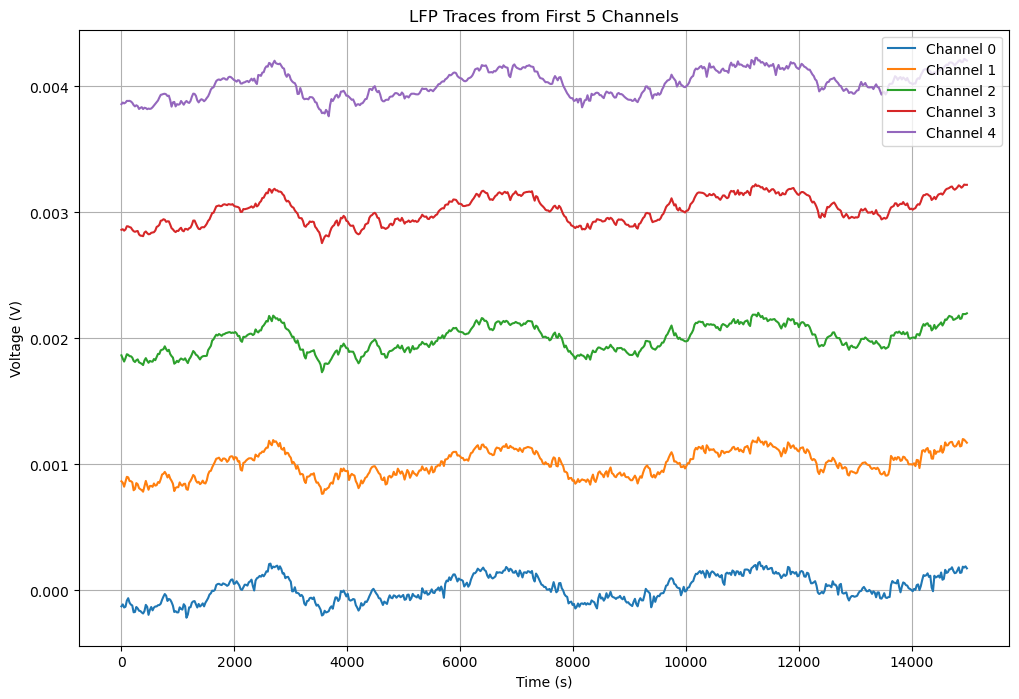

In [4]:
# Get LFP data
lfp = nwb.acquisition['probe_1_lfp_data']
sampling_rate = 625.0  # From probe metadata

# Extract a short segment of LFP data (first 1 second, first 5 channels)
n_samples = int(sampling_rate)
lfp_segment = lfp.data[0:n_samples, 0:5]
time_vector = lfp.timestamps[0:n_samples]

# Plot LFP traces
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(time_vector, lfp_segment[:, i] + i*0.001, label=f'Channel {i}')
    
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('LFP Traces from First 5 Channels')
plt.legend()
plt.grid(True)
plt.show()

## Electrode Locations and Properties

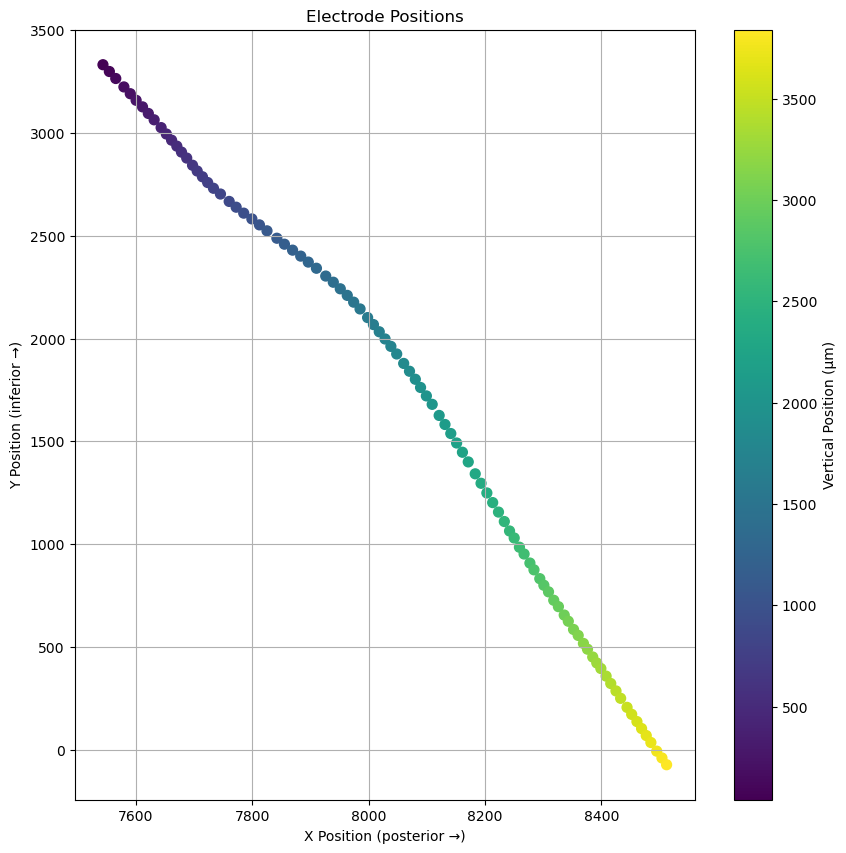

In [5]:
# Convert electrodes table to a more accessible format
electrodes_df = nwb.electrodes.to_dataframe()

# Plot electrode positions
plt.figure(figsize=(10, 10))
plt.scatter(electrodes_df['x'], electrodes_df['y'], c=electrodes_df['probe_vertical_position'],
           cmap='viridis', s=50)
plt.colorbar(label='Vertical Position (μm)')
plt.xlabel('X Position (posterior →)')
plt.ylabel('Y Position (inferior →)')
plt.title('Electrode Positions')
plt.grid(True)
plt.show()

## Summary Statistics

In [6]:
# Print key information about the recording
print(f"Number of electrodes: {len(electrodes_df)}")
print(f"Number of brain regions recorded: {len(electrodes_df['location'].unique())}")
print("\nBrain regions:")
for region in electrodes_df['location'].unique():
    count = len(electrodes_df[electrodes_df['location'] == region])
    print(f"- {region}: {count} electrodes")

Number of electrodes: 96
Number of brain regions recorded: 17

Brain regions:
- Eth: 2 electrodes
- LP: 12 electrodes
- POL: 1 electrodes
- TH: 2 electrodes
- APN: 2 electrodes
- MB: 5 electrodes
- DG-mo: 11 electrodes
- DG-sg: 4 electrodes
- ProS: 9 electrodes
- SUB: 14 electrodes
- VISpm6b: 1 electrodes
- VISpm6a: 5 electrodes
- VISpm5: 6 electrodes
- RSPagl5: 2 electrodes
- RSPagl2/3: 7 electrodes
- RSPagl1: 4 electrodes
- root: 9 electrodes


## Next Steps

With this dataset, researchers can:
1. Analyze temporal precision of neural responses across brain regions
2. Compare response patterns between different visual stimuli conditions
3. Investigate LFP characteristics across cortical layers
4. Study the relationship between electrode location and response properties